Import Libaraies 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, auc
#from imblearn.over_sampling import RandomOverSampler


Load The dataset 

In [18]:
data = pd.read_csv('Datasets\FinalCreditCard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
4996,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
4997,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
4998,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


Preprocessing 

Since our dataset is scaled Already, except the Amount and Time colomns are left to scale. so produdre we will follow in Preprocessing phase as follow:
* using RobustScaler to scale Time and Amount columns because it is not effected by small number of huge marginal outliers.



In [19]:
# taking the fraud and not fruad data separtely 
fraud = data[data['Class'] == 1]
notfraud = data[data['Class'] == 0]

In [20]:
rob_scaler = RobustScaler()
#Scale Time and Amount Outliers
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

In [21]:
#Reomeve the coloumns before, becase we already done scaling
data.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

In [22]:
data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# Put the new columns in suitable order
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

In [23]:
#the data after is completely scaled 
fraud = data[data['Class'] == 1]
notfraud = data[data['Class'] == 0]
data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.303559,-0.909889,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.210643,-0.909889,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,6.222793,-0.909450,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.856605,-0.909450,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.940965,-0.909011,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


# Training Phase 
As well as our dataset is clearly unbalanced, we will utilize StratifiedShuffleSplit() function. this function used to split data train/test sets by their indices. StratifiedShuffleSplit() is Cross-Validation object combine between two things, which are: ShuffleSplit and StratifiedKFold, and it produces Stratified Randomize Folds. Those folds are made by maintain the percentage of samples for each class.

In [34]:
# see the percentages of fraud and non fraud  

print('Not Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')


Not Frauds 90.16 % of the dataset
Frauds 9.84 % of the dataset


In [57]:
X = data.drop('Class', axis=1)
y = data['Class']
X

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,2.303559,-0.909889,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,-0.210643,-0.909889,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,6.222793,-0.909450,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,1.856605,-0.909450,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,0.940965,-0.909011,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6.416838,73.348480,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,...,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968
4996,-0.243669,73.438481,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,...,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637
4997,1.076146,73.440237,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,...,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361
4998,3.935661,73.710240,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,...,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700


In [58]:
#Extracting 70% of the datasets 
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

In [59]:
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    data_Xtrain, data_Xtest = X.iloc[train_index], X.iloc[test_index]
    data_ytrain, data_ytest = y.iloc[train_index], y.iloc[test_index]

Train: [4327 4175  282 ... 1837 1914 3282] Test: [1930 2723 1968 ... 2956 3674 3090]


In [60]:
#to check the distribution of data
train_unique_label, train_counts_label = np.unique(data_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(data_ytest, return_counts=True)
print('-' * 50)

print('Label Distributions: [Fraud Not-Fraud]')
print('Train: ')
print(train_counts_label/ len(data_ytrain))
print(train_counts_label)
print('Test: ')
print(test_counts_label/ len(data_ytest))
print(test_counts_label)

data_Xtrain.head()

--------------------------------------------------
Label Distributions: [Fraud Not-Fraud]
Train: 
[0.90171429 0.09828571]
[3156  344]
Test: 
[0.90133333 0.09866667]
[1352  148]


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
4327,0.057837,0.740863,1.347239,-0.468724,0.659279,-0.494070,-0.960005,-0.556445,-0.771329,-0.084322,...,0.049968,-0.051700,-0.223821,-0.554318,0.179944,-0.040405,0.096299,-0.487627,-0.008361,0.012329
4175,0.102669,0.736033,1.421832,-0.492554,-0.023678,-1.024934,0.038346,0.785589,-0.831478,0.108989,...,0.982620,0.092759,-0.271269,-0.669532,-0.062000,-1.794172,0.333973,-0.401932,-0.007592,-0.012509
282,1.095140,-0.822083,-1.269461,-1.027153,2.261373,-0.504356,0.693421,1.237761,0.056065,0.091919,...,-3.463993,-0.527727,-0.131777,0.697266,0.288501,-0.644487,0.027409,-0.329714,-0.291795,-0.381556
1999,-0.171116,-0.231588,-0.693979,0.863780,1.782080,-0.621203,-0.034457,-0.556248,0.704357,0.061961,...,0.121181,0.081262,-0.124982,-0.122718,-0.158336,0.590370,-0.014215,0.344616,0.284906,0.157360
2662,0.411533,0.057732,-0.528280,1.297138,1.497918,1.128073,1.015072,0.182683,1.317492,-0.331670,...,-1.154711,-0.009357,-0.056918,-0.080751,-0.286461,-0.652466,-0.042145,-0.245139,-0.188071,-0.102000


In [69]:
print(data_Xtrain.info())
#print(data_ytrain.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3500 entries, 4327 to 3282
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scaled_amount  3500 non-null   float64
 1   scaled_time    3500 non-null   float64
 2   V1             3500 non-null   float64
 3   V2             3500 non-null   float64
 4   V3             3500 non-null   float64
 5   V4             3500 non-null   float64
 6   V5             3500 non-null   float64
 7   V6             3500 non-null   float64
 8   V7             3500 non-null   float64
 9   V8             3500 non-null   float64
 10  V9             3500 non-null   float64
 11  V10            3500 non-null   float64
 12  V11            3500 non-null   float64
 13  V12            3500 non-null   float64
 14  V13            3500 non-null   float64
 15  V14            3500 non-null   float64
 16  V15            3500 non-null   float64
 17  V16            3500 non-null   float64
 18  V17       

In [61]:
import itertools

#to prints and plots the confusion matrix 
#Normilization is done by setting normalize=True

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Building the model phase  

In [62]:
# Assuming you have the data loaded into original_Xtrain, original_ytrain, original_Xtest, and original_ytest

# Initialize StratifiedShuffleSplit for cross-validation
sss = StratifiedShuffleSplit(n_splits=7, test_size=0.0015, random_state=42)

# Initialize the model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=30))  # Update input_dim to 29
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Initialize scaler
scaler = RobustScaler()
history_list = []

# Initialize an array to store accuracy scores for each fold
accuracy_scores = []

In [75]:



for train_val_index, test_val_index in sss.split(data_Xtrain, data_ytrain):
    X_train, X_val = data_Xtrain.iloc[train_val_index], data_Xtrain.iloc[test_val_index]
    y_train, y_val = data_ytrain.iloc[train_val_index], data_ytrain.iloc[test_val_index]

    #train_val_data =  pd.DataFrame(X_train)
   
    train_val_data = train_val_data.assign(Class=y_train)
    #train_val_data=pd.DataFrame(train_val_data)

    fraud_df = train_val_data.loc[train_val_data['Class'] == 1]
    notfraud_df = train_val_data.loc[train_val_data['Class'] == 0].sample(len(fraud_df))

    print(f'Relation fraud non-fraud in the CV set: {len(fraud_df)} x {len(non_fraud_df)}')

    print(f'Test training relationship {len(notfraud_df)+len(fraud_df)} x {len(y_val)}')
    print(f'Test training relationship {(len(notfraud_df)+len(fraud_df))/(len(non_fraud_df)+len(fraud_df)+len(y_val))} x {len(y_val)/(len(non_fraud_df)+len(fraud_df)+len(y_val))}')
    
        
        
    X_train_resampled = pd.concat([fraud_df, notfraud_df]).drop('Class', axis=1)
    y_train_resampled = pd.concat([fraud_df, notfraud_df])['Class']
    
    print(X_train_resampled)

    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_val_scaled = scaler.transform(X_val)

    # Fit the model
    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    history = model.fit(x=X_train_scaled, y=y_train_resampled, epochs=1000, validation_data=(X_val_scaled, y_val),
                        callbacks=[early_stop])

    history_list.append(history.history)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_val_scaled, y_val)
    print(f"Validation Accuracy: {accuracy}")
    accuracy_scores.append(accuracy)

# Print the average accuracy across all folds
print(f"Average Accuracy Neural Network: {np.mean(accuracy_scores)}")

# Evaluate the model on the test set
X_test_scaled = scaler.transform(data_Xtest)
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate the confusion matrix
conf_matrix = confusion_matrix(data_ytest, y_pred)

# Print the classification report
print("\nClassification Report:\n", classification_report(data_ytest, y_pred))
print("Recall: ", recall_score(data_ytest, y_pred))

# Plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

Relation fraud non-fraud in the CV set: 343 x 343
Test training relationship 686 x 6
Test training relationship 0.9913294797687862 x 0.008670520231213872
Empty DataFrame
Columns: []
Index: [4778, 4882, 4730, 4674, 4638, 4593, 4989, 4602, 4579, 4978, 4532, 4773, 4818, 4831, 4572, 4865, 4595, 4782, 4873, 4817, 4994, 4557, 4954, 4528, 4993, 4560, 4533, 4512, 4768, 4806, 4608, 4735, 4641, 4620, 4683, 4615, 4543, 4686, 4957, 4791, 4981, 4738, 4905, 4871, 4943, 4976, 4767, 4892, 4656, 4740, 4896, 4797, 4654, 4960, 4836, 4977, 4710, 4794, 4834, 4644, 4605, 4956, 4633, 4558, 4519, 4975, 4544, 4531, 4852, 4990, 4765, 4965, 4811, 4915, 4545, 4585, 4945, 4712, 4691, 4665, 4800, 4671, 4606, 4627, 4660, 4723, 4621, 4726, 4813, 4707, 4944, 4573, 4525, 4521, 4574, 4759, 4844, 4898, 4648, 4810, ...]

[686 rows x 0 columns]


ValueError: at least one array or dtype is required

In [79]:
for train_val_index, test_val_index in sss.split(data_Xtrain, data_ytrain):
    X_train, X_val = data_Xtrain.iloc[train_val_index], data_Xtrain.iloc[test_val_index]
    y_train, y_val = data_ytrain.iloc[train_val_index], data_ytrain.iloc[test_val_index]

    train_val_data = X_train
    train_val_data = train_val_data.assign(Class=y_train)
    print(train_val_data)

    fraud_df = train_val_data.loc[train_val_data['Class'] == 1]
    non_fraud_df = train_val_data.loc[train_val_data['Class'] == 0].sample(len(fraud_df))
    print(f'Relation fraud non-fraud in the CV set: {len(fraud_df)} x {len(non_fraud_df)}')

    print(f'Test training relationship {len(notfraud_df)+len(fraud_df)} x {len(y_val)}')
    print(f'Test training relationship {(len(notfraud_df)+len(fraud_df))/(len(non_fraud_df)+len(fraud_df)+len(y_val))} x {len(y_val)/(len(non_fraud_df)+len(fraud_df)+len(y_val))}')
    
    X_train_resampled = pd.concat([fraud_df, non_fraud_df]).drop('Class', axis=1)
    y_train_resampled = pd.concat([fraud_df, non_fraud_df])['Class']
    
    print(X_train_resampled)

    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_val_scaled = scaler.transform(X_val)
    
    # Fit the model
    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    history = model.fit(x=X_train_scaled, y=y_train_resampled, epochs=10, validation_data=(X_val_scaled, y_val),
                        callbacks=[early_stop])

    history_list.append(history.history)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_val_scaled, y_val)
    print(f"Validation Accuracy: {accuracy}")
    accuracy_scores.append(accuracy)

      scaled_amount  scaled_time        V1        V2        V3        V4  \
4778       5.806468    36.315004 -1.430864 -0.802529  1.123320  0.389760   
1845      -0.222793    -0.281638  1.192420  0.076970  0.583453  0.665919   
2236      -0.234600    -0.133246  1.241908  0.205299  0.398826  0.424773   
2865      -0.140828     0.156514 -0.436030  1.635475  1.647855  2.468624   
1564       4.482033    -0.371200 -2.749525 -3.300879  1.933082  0.312397   
...             ...          ...       ...       ...       ...       ...   
3024       0.331622     0.221491 -1.335640  0.093758  1.716347  0.321310   
4237       0.020363     0.738229  1.451138 -0.601564 -0.886202 -1.637269   
1419       6.026694    -0.428274  0.483432 -1.533762  0.618801 -0.491250   
1656      -0.008556    -0.345736 -3.835659 -1.955510 -0.404067  0.438873   
648       -0.085558    -0.694326  1.130024 -0.060944  0.662074  1.033990   

            V5        V6        V7        V8  ...       V20       V21  \
4778 -0.281214

Average Accuracy Neural Network: 1.0
47/47 [==============================] - 0s 2ms/step

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1352
           1       0.99      0.98      0.99       148

    accuracy                           1.00      1500
   macro avg       1.00      0.99      0.99      1500
weighted avg       1.00      1.00      1.00      1500

Recall:  0.9797297297297297


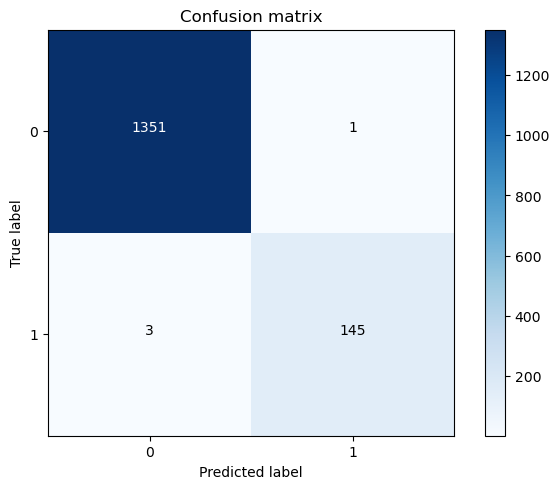

In [80]:
# Print the average accuracy across all folds
print(f"Average Accuracy Neural Network: {np.mean(accuracy_scores)}")

# Evaluate the model on the test set
X_test_scaled = scaler.transform(data_Xtest)
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate the confusion matrix
conf_matrix = confusion_matrix(data_ytest, y_pred)

# Print the classification report
print("\nClassification Report:\n", classification_report(data_ytest, y_pred))
print("Recall: ", recall_score(data_ytest, y_pred))

# Plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion matrix')
plt.show()